# Pet Adoption Classification

In [32]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Dataset overview

In [20]:
df = pd.read_csv('pet_adoption_data.csv')

df.head(n=15)

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
5,505,Dog,Labrador,70,Brown,Large,20.986261,0,0,87,301,1,0
6,506,Bird,Parakeet,169,Brown,Small,10.902613,1,0,70,440,1,0
7,507,Cat,Siamese,13,Orange,Large,7.252683,1,0,3,137,0,1
8,508,Bird,Parakeet,49,Brown,Medium,24.597598,1,1,69,405,0,0
9,509,Bird,Parakeet,60,Gray,Large,7.295994,0,0,73,231,1,0


In [12]:
df.shape

(2007, 13)

In [13]:
df.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


### Numerical features summary

In [15]:
df.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


### Categorical features

In [31]:
print(df.describe(include='object'))

       PetType   Breed  Color    Size
count     2007    2007   2007    2007
unique       4       7      5       3
top        Dog  Rabbit  White  Medium
freq       522     493    420     714


### Target values distribution

In [19]:
df.AdoptionLikelihood.unique()

array([0, 1], dtype=int64)

In [21]:
print(df["AdoptionLikelihood"].value_counts())

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64


In [24]:
print(df["AdoptionLikelihood"].value_counts(normalize=True) * 100) #percentage

AdoptionLikelihood
0    67.164923
1    32.835077
Name: proportion, dtype: float64


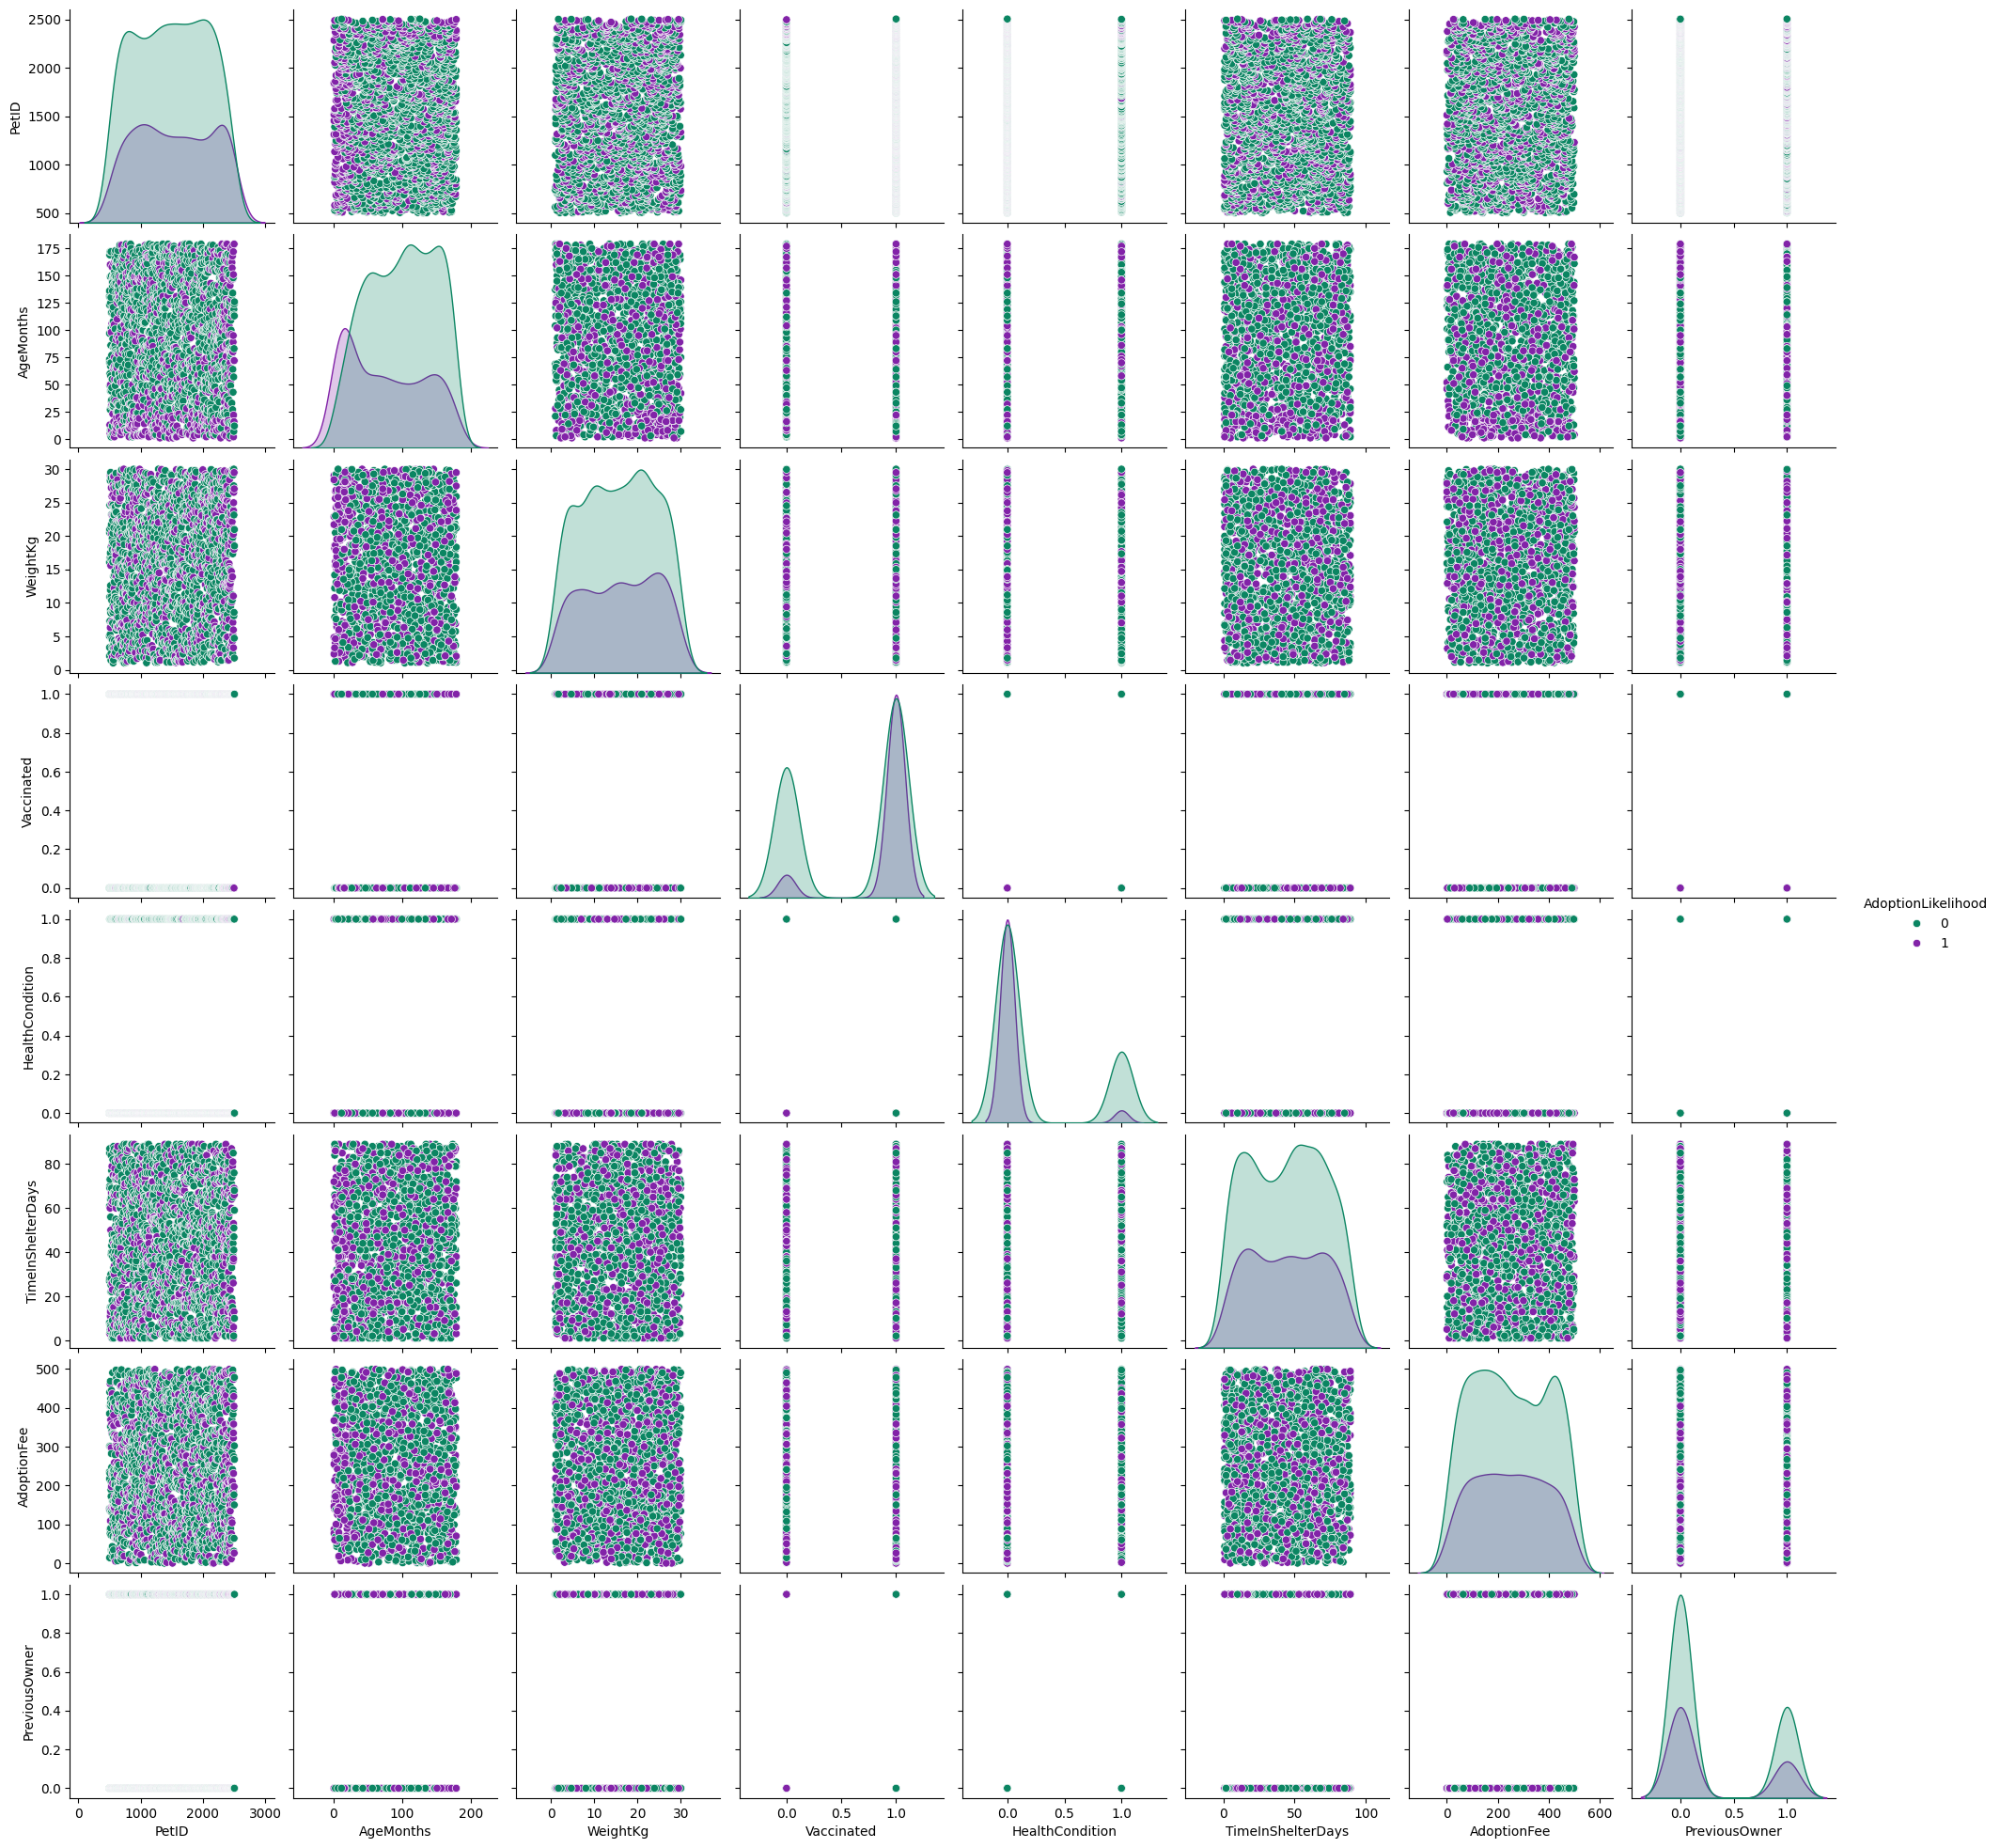

In [35]:
sns.pairplot(df, hue='AdoptionLikelihood', palette=['#0b8562', '#8223a8'])